# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type

total_rides = pyber_df.groupby(["type"]).count()["ride_id"]

In [4]:
# 2. Get the total drivers for each city type

total_drivers = city_df.groupby(["type"]).sum()["driver_count"]

In [5]:
#  3. Get the total amount of fares for each city type

total_fares = pyber_df.groupby(["type"]).sum()["fare"]

In [6]:
#  4. Get the average fare per ride for each city type. 

mean_fares = pyber_df.groupby(["type"]).mean()["fare"]

In [7]:
# 5. Get the average fare per driver for each city type. 

mean_driver_fares = total_fares / total_drivers

In [8]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({
    "Total Rides" : total_rides,
    "Total Drivers" : total_drivers,
    "Total Fares" : total_fares,
    "Average Fare per Ride" : mean_fares,
    "Average Fare per Driver" : mean_driver_fares
})

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame

# create a new DataFrame with multiple indices using the groupby() function on the 
# "type" and "date" columns of the pyber_data_df DataFrame, then apply the sum() method 
# on the "fare" column to show the total fare amount for each date.

fares_by_date = pyber_df.groupby(["type", "date"]).sum()["fare"]

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

all_fares = pd.DataFrame(fares_by_date.groupby(["type","date"]).sum())

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

all_fares = all_fares.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

type_fares = all_fares.pivot("date", "type", "fare") # df.pivot(index, columns, values)

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

type_fares = type_fares.loc["2019-01-01" : "2019-04-29"]

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

type_fares.index = pd.to_datetime(type_fares.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()

print(type_fares.index.dtype), print(f"\n")
type_fares.info()

datetime64[ns]


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

weekly_fares = type_fares.resample("W").sum()

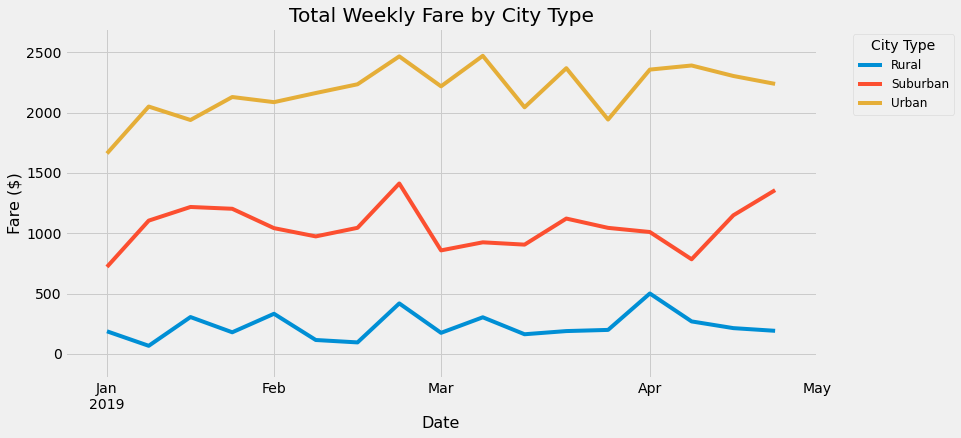

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fp = weekly_fares.plot(y=["Rural","Suburban","Urban"], kind = "line",
                       title = "Total Weekly Fare by City Type",
                       xlabel = "Date", ylabel = "Fare ($)",
                       ylim = (-200,2700),
                       figsize = (12,6))
fp.set_xlim(pd.Timestamp('2018-12-30'), pd.Timestamp('2019-05-01'))
fp.set_xlabel("Date", fontsize = 16)
fp.set_ylabel("Fare ($)", fontsize = 16)
fp.legend(title="City Type", mode="expanded", fontsize=12,
          bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig("analysis/PyBer_fare_summary.png", facecolor='white', bbox_inches="tight")
